# **CHESS PAWN DETECTION USING YOLOv5 MODEL**

### **Cloning the git repository of YOLOv5 Model**

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.8.1+cu101 (Tesla T4)


### **Installing requirements and importing pytorch**

In [ ]:
%pip install -qr requirements.txt

import torch
from IPython.display import Image

### **Zipped and copied the data file(consisting of images and labels) to colab from the local system**

### **Unzipping the data file**

In [ ]:
!unzip -q ../Chess_data.zip -d ../

In [ ]:
# Train images

!ls ../Chess_data/images/train/

00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.1a1407058a6170f001f2c269411d31d3.jpg
00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.20e061b75dc554ebe40b33189e320831.jpg
00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.38c0bb7971151bf4cb185f5498fddcc0.jpg
00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.fbcc3af401eca6bf01b4d031af33c1fc.jpg
0115e4df73475b550e5c6f7a88b2474f_jpg.rf.22f030d1bd7a26c987f287d2de4b19c7.jpg
0115e4df73475b550e5c6f7a88b2474f_jpg.rf.254cb905329fee7e2df63d14b15368db.jpg
0115e4df73475b550e5c6f7a88b2474f_jpg.rf.9d4f5de6e48861cf9108e46aee8dbb8f.jpg
0115e4df73475b550e5c6f7a88b2474f_jpg.rf.c759321c26b9bc9c38b31cd49533d350.jpg
02f0931b536dfba10affc3231a3d64fb_jpg.rf.087fbe5ea178dd757f4eb065ae5cf941.jpg
02f0931b536dfba10affc3231a3d64fb_jpg.rf.3a714622550c2311f7843cd103a50be3.jpg
02f0931b536dfba10affc3231a3d64fb_jpg.rf.51d15aa9df1efc29ceca818ecbce37e1.jpg
02f0931b536dfba10affc3231a3d64fb_jpg.rf.d1c527f45625192911705f97416af54b.jpg
0301b7f9ed4d5ba503fda79fc4370c29_jpg.rf.56da1174519560712119d3fc195068cb.jpg

In [ ]:
# Train labels

!ls ../Chess_data/labels/train/

00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.1a1407058a6170f001f2c269411d31d3.txt
00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.20e061b75dc554ebe40b33189e320831.txt
00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.38c0bb7971151bf4cb185f5498fddcc0.txt
00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.fbcc3af401eca6bf01b4d031af33c1fc.txt
0115e4df73475b550e5c6f7a88b2474f_jpg.rf.22f030d1bd7a26c987f287d2de4b19c7.txt
0115e4df73475b550e5c6f7a88b2474f_jpg.rf.254cb905329fee7e2df63d14b15368db.txt
0115e4df73475b550e5c6f7a88b2474f_jpg.rf.9d4f5de6e48861cf9108e46aee8dbb8f.txt
0115e4df73475b550e5c6f7a88b2474f_jpg.rf.c759321c26b9bc9c38b31cd49533d350.txt
02f0931b536dfba10affc3231a3d64fb_jpg.rf.087fbe5ea178dd757f4eb065ae5cf941.txt
02f0931b536dfba10affc3231a3d64fb_jpg.rf.3a714622550c2311f7843cd103a50be3.txt
02f0931b536dfba10affc3231a3d64fb_jpg.rf.51d15aa9df1efc29ceca818ecbce37e1.txt
02f0931b536dfba10affc3231a3d64fb_jpg.rf.d1c527f45625192911705f97416af54b.txt
0301b7f9ed4d5ba503fda79fc4370c29_jpg.rf.56da1174519560712119d3fc195068cb.txt

### **Downloaded the yolov5 configuration file(data.yaml), edited it customized to the Chess_data and uploaded the custom config file(custom_data.yaml) into the data folder**

### **Training the model on Chess_data**

In [ ]:
!python train.py --img 640 --batch 16 --epochs 300 --data custom_data.yaml --weights yolov5s.pt --nosave --cache

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-143-g3597d28 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=True, cfg='', data='./data/custom_data.yaml', device='', entity=None, epochs=300, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=True, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp2', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-06-05 15:36:46.664057: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully open

### **Testing what the model can do with the trained weights**

In [ ]:
!python detect.py --weights runs/train/exp2/weights/last.pt --img 640 --conf 0.25 --source /content/Chess_data/images/val/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, half=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='/content/Chess_data/images/val/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg', update=False, view_img=False, weights=['runs/train/exp2/weights/last.pt'])
YOLOv5 🚀 v5.0-143-g3597d28 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7086274 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/Chess_data/images/val/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg: 640x640 1 white-queen, Done. (0.016s)
Results saved to runs/detect/exp
Done. (0.034s)


### **Visualizing the performance metrics**

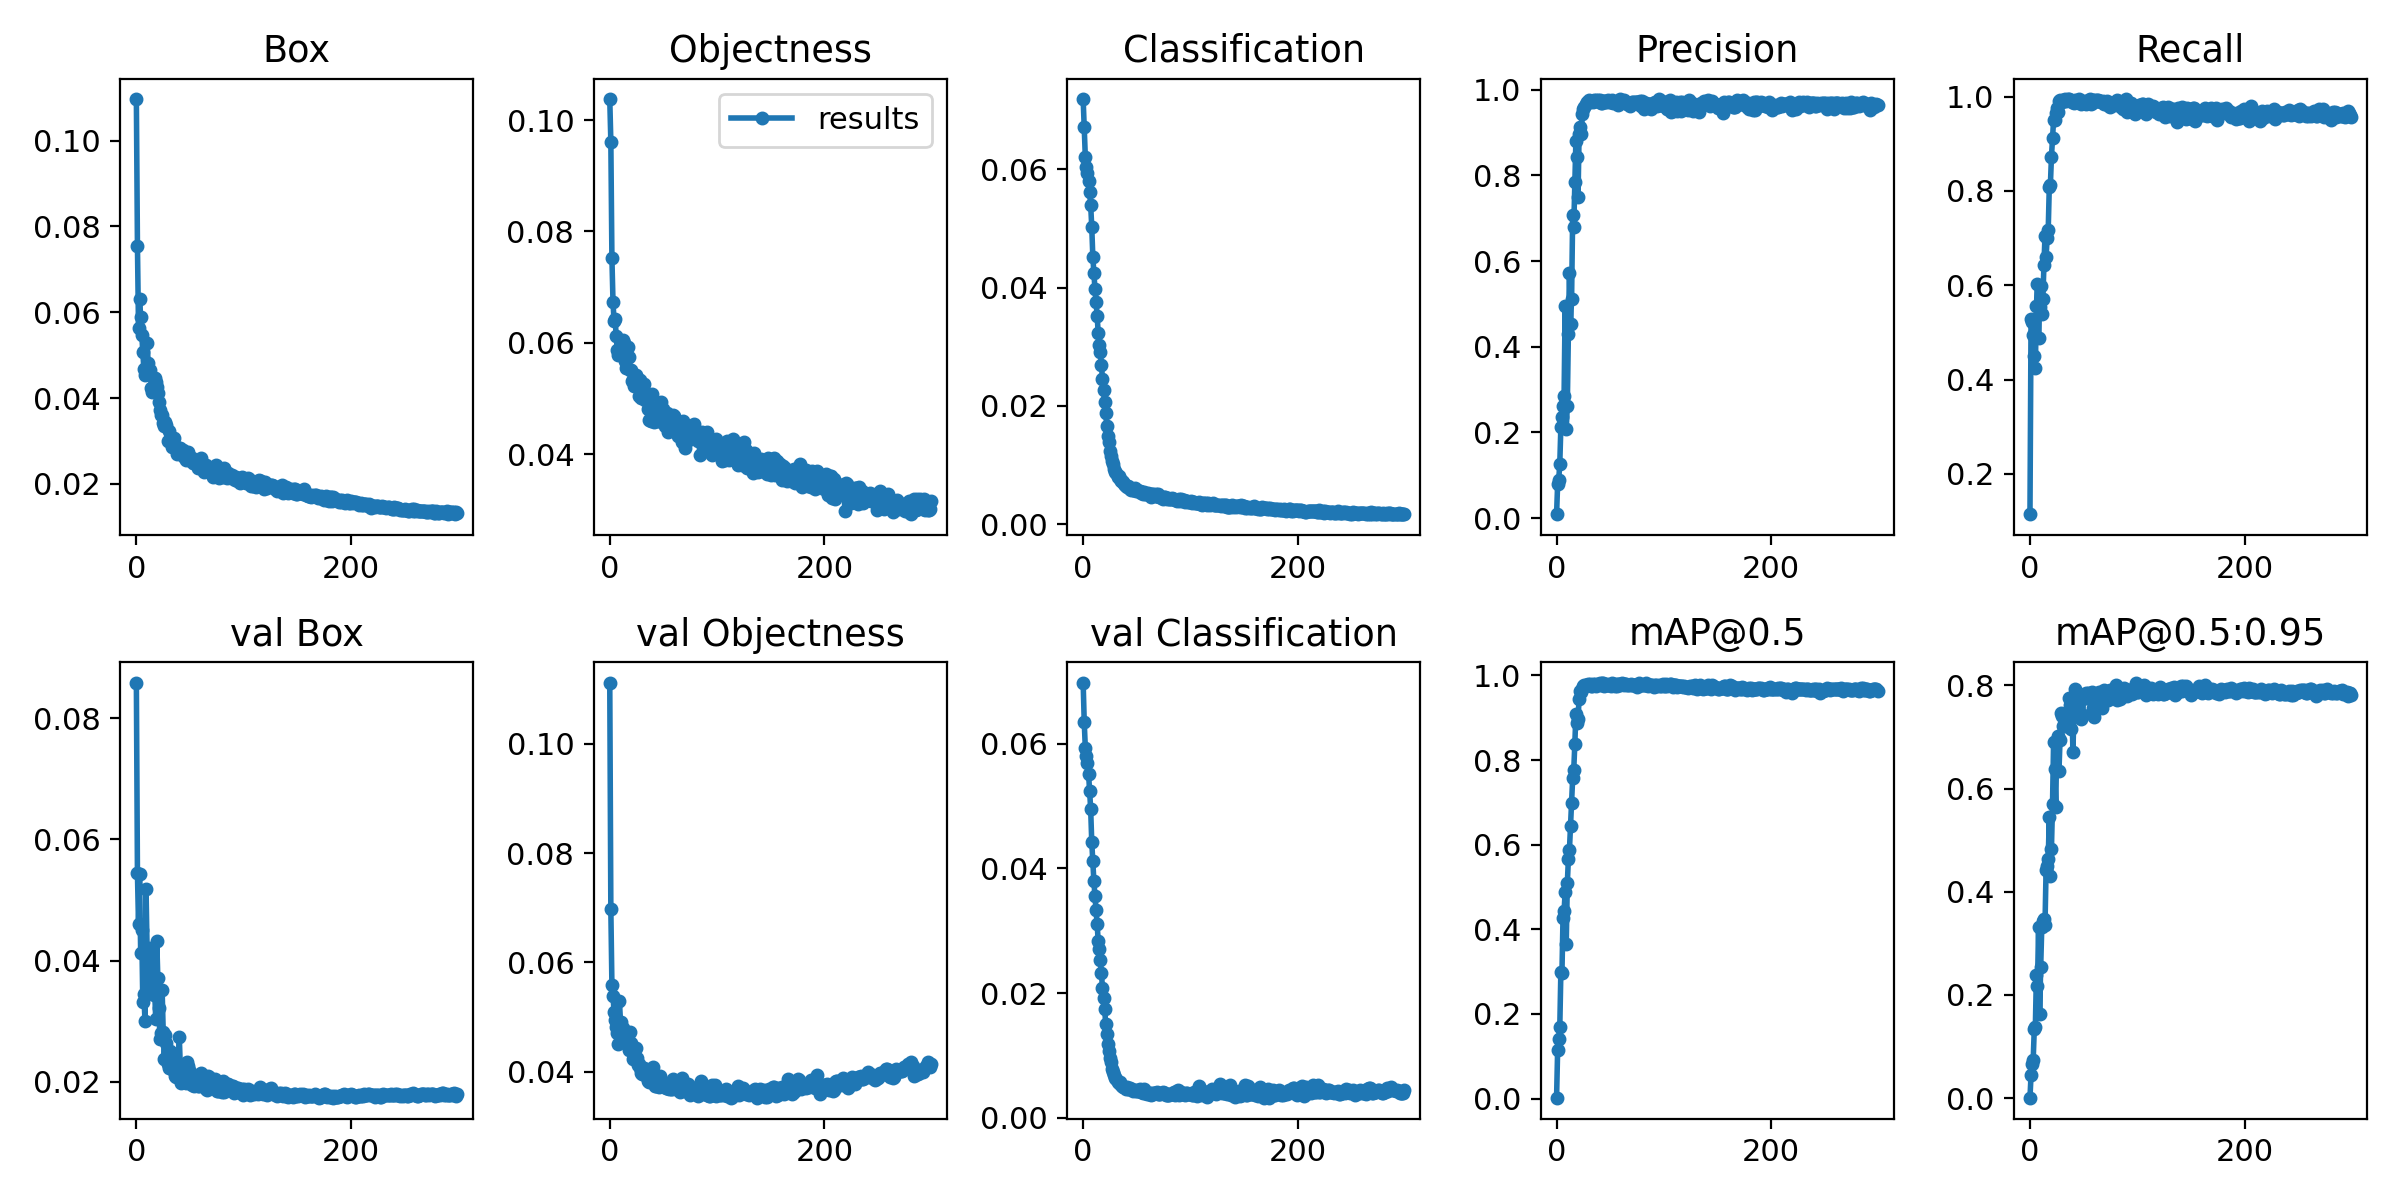

In [ ]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/exp2')  # plot all results*.txt as results.png
Image(filename='runs/train/exp2/results.png', width=800)

### **Zipping and downloading the entire model file to the local system to further deploy it**

In [ ]:
!zip -r /content/yolov5.zip /content/yolov5

  adding: content/yolov5/ (stored 0%)
  adding: content/yolov5/.dockerignore (deflated 56%)
  adding: content/yolov5/yolov5s.pt (deflated 8%)
  adding: content/yolov5/requirements.txt (deflated 50%)
  adding: content/yolov5/weights/ (stored 0%)
  adding: content/yolov5/weights/download_weights.sh (deflated 28%)
  adding: content/yolov5/hubconf.py (deflated 72%)
  adding: content/yolov5/detect.py (deflated 66%)
  adding: content/yolov5/runs/ (stored 0%)
  adding: content/yolov5/runs/detect/ (stored 0%)
  adding: content/yolov5/runs/detect/exp/ (stored 0%)
  adding: content/yolov5/runs/detect/exp/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg (deflated 6%)
  adding: content/yolov5/runs/train/ (stored 0%)
  adding: content/yolov5/runs/train/exp/ (stored 0%)
  adding: content/yolov5/runs/train/exp/labels.jpg (deflated 17%)
  adding: content/yolov5/runs/train/exp/results.txt (deflated 74%)
  adding: content/yolov5/runs/train/exp/train_batch1.jpg (deflated 2%)
 